<a href="https://colab.research.google.com/github/ThienBao224/Python/blob/main/Tu%E1%BA%A7n3_Bu%E1%BB%95i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập Ngôn ngữ lập trình  Python tuần 3 buổi 2

## Câu 1: Sử dụng Python để tạo fiel excel bán hàng sau với tên doanhsobanhang.xlxs

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/6_Nguyễn Hoàng Thiên Bảo_Tuần3/doanhsobanhang.xlsx"
data = {
    "STT": [1,2,3,4,5,6,7,8,9],
    "Tên hàng hoá": ["Tivi", "Tủ lạnh", "Máy giặt", "Lò nướng", "Máy lạnh",
                     "Quạt máy", "Máy vi tính", "Đồng hồ thông minh", "Bình giữ nhiệt"],
    "Ngày nhập hàng": ["10/5","10/4","24/3","25/8","17/4","2/1","14/2","18/9","26/3"],
    "Số lượng nhập": [30,15,25,16,18,19,20,36,27],
    "Số lượng hàng trong kho": [5,7,5,6,9,2,4,5,7],
    "Tổng số lượng hàng có trong kho": [None]*9,
    "Số lượng hàng bán tháng 9": [20,10,8,9,7,8,9,7,15],
    "Số lượng còn lại": [None]*9
}

df = pd.DataFrame(data)
df.to_excel(file_path, index=False, sheet_name='DoanhThuBanHang')
print(f"Đã tạo file thành công: {file_path}")


Đã tạo file thành công: /content/drive/MyDrive/6_Nguyễn Hoàng Thiên Bảo_Tuần3/doanhsobanhang.xlsx


In [ ]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.chart import PieChart, Reference
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart.label import DataLabelList

# a) Tổng số lượng hàng có trong kho
df["Tổng số lượng hàng có trong kho"] = df["Số lượng nhập"] + df["Số lượng hàng trong kho"]

# b) Số lượng còn lại
df["Số lượng còn lại"] = df["Tổng số lượng hàng có trong kho"] - df["Số lượng hàng bán tháng 9"]

# c) Xếp hạng số lượng còn lại
df["Xếp hạng"] = df["Số lượng còn lại"].rank(ascending=False, method="min")

# d) Vẽ biểu đồ tròn cho số lượng còn lại
wb = Workbook()
ws = wb.active
ws.title = "Kết quả"

for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

chart = PieChart()
chart.title = "Tỉ lệ số lượng còn lại"

data = Reference(ws, min_col=df.columns.get_loc("Số lượng còn lại")+1,
                 min_row=1, max_row=len(df)+1)
categories = Reference(ws, min_col=df.columns.get_loc("Tên hàng hoá")+1,
                       min_row=2, max_row=len(df)+1)

chart.add_data(data, titles_from_data=True)
chart.set_categories(categories)
chart.dataLabels = DataLabelList()
chart.dataLabels.showPercent = True

ws.add_chart(chart, "M2")

# e) Xuất file excel ketquadoanso.xlsx
output_file = "/content/drive/MyDrive/6_Nguyễn Hoàng Thiên Bảo_Tuần3/ketquadoanso.xlsx"
wb.save(output_file)

print(f"File đã được lưu thành công: {output_file}")


File đã được lưu thành công: /content/drive/MyDrive/6_Nguyễn Hoàng Thiên Bảo_Tuần3/ketquadoanso.xlsx


## Bài tập 2: Vẽ biểu đồ đường

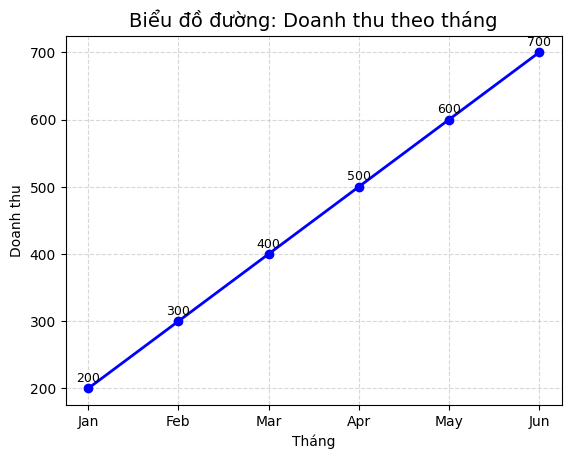

In [ ]:
import matplotlib.pyplot as plt

thang = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
doanh_thu = [200, 300, 400, 500, 600, 700]

plt.plot(thang, doanh_thu, marker='o', linestyle='-', color='b', linewidth=2)


plt.title("Biểu đồ đường: Doanh thu theo tháng", fontsize=14)
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")

for i, value in enumerate(doanh_thu):
    plt.text(thang[i], value + 10, str(value), ha='center', fontsize=9)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Bài tập 3: Vẽ biểu đồ cột

1. Vẽ biểu đồ cột cho dữ liệu sau:
o	Danh mục: ['A', 'B', 'C', 'D']
o	Giá trị: [5, 10, 15, 20]


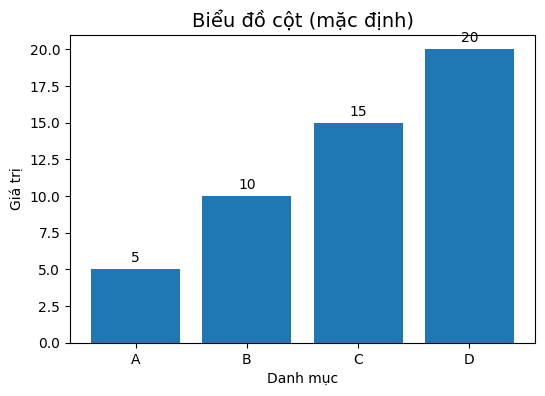

In [ ]:
danh_muc = ['A', 'B', 'C', 'D']
gia_tri = [5, 10, 15, 20]

plt.figure(figsize=(6,4))
plt.bar(danh_muc, gia_tri)
plt.title("Biểu đồ cột (mặc định)", fontsize=14)
plt.xlabel("Danh mục")
plt.ylabel("Giá trị")

# Hiển thị giá trị trên đầu cột
for i, v in enumerate(gia_tri):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.show()


2. Thay đổi màu sắc của các thanh cột.

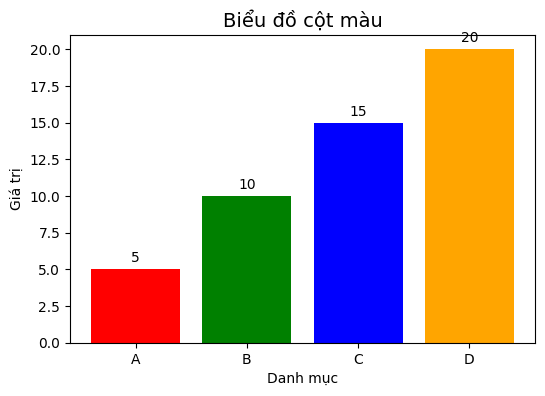

In [ ]:
mau = ['red', 'green', 'blue', 'orange']  # màu từng cột
plt.figure(figsize=(6,4))
plt.bar(danh_muc, gia_tri, color=mau)
plt.title("Biểu đồ cột màu", fontsize=14)
plt.xlabel("Danh mục")
plt.ylabel("Giá trị")
# Hiển thị giá trị trên đầu cột
for i, v in enumerate(gia_tri):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)

## Bài tập 4: Vẽ biểu đồ tròn

1.	Vẽ biểu đồ tròn cho dữ liệu sau:
o	Nhóm: ['X', 'Y', 'Z']
o	Tỷ lệ: [30, 50, 20]


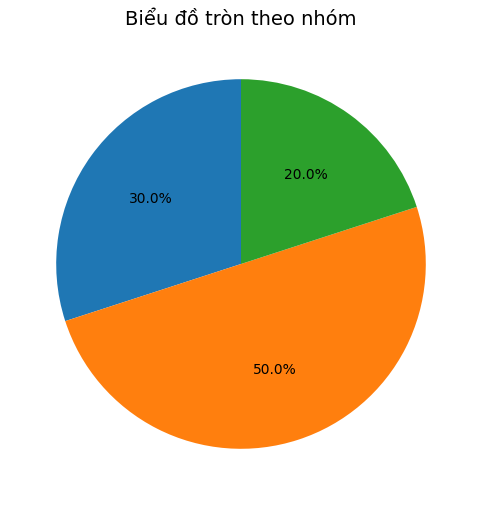

In [ ]:
import matplotlib.pyplot as plt

ty_le = [30, 50, 20]

plt.figure(figsize=(6,6))
plt.pie(ty_le, autopct='%1.1f%%', startangle=90)

plt.title("Biểu đồ tròn theo nhóm", fontsize=14)
plt.show()


2.	Thêm nhãn cho từng phần của biểu đồ.

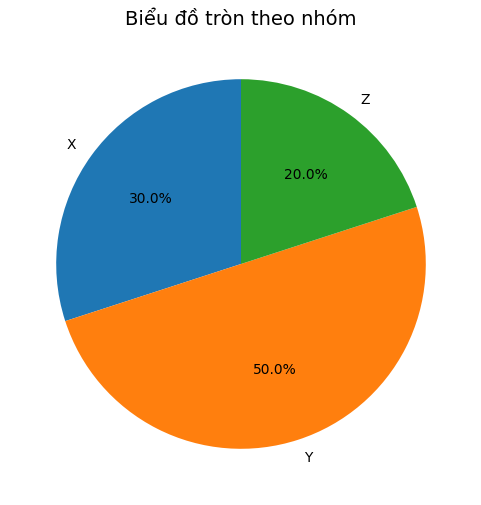

In [ ]:
import matplotlib.pyplot as plt

nhom = ['X', 'Y', 'Z']
ty_le = [30, 50, 20]

plt.figure(figsize=(6,6))
plt.pie(ty_le, labels=nhom, autopct='%1.1f%%', startangle=90)

plt.title("Biểu đồ tròn theo nhóm", fontsize=14)
plt.show()


## Bài tập 5: Vẽ biểu đồ phân tán


1.	Vẽ biểu đồ phân tán cho dữ liệu sau:
o	Trục X: [1, 2, 3, 4, 5]
o	Trục Y: [2, 3, 5, 7, 11]

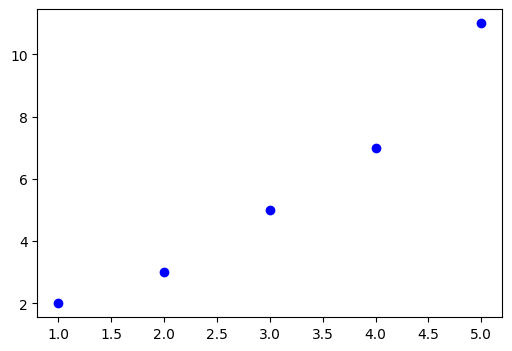

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color="blue", marker="o")

plt.show()


2.	Thêm tiêu đề cho biểu đồ và nhãn cho các trục.

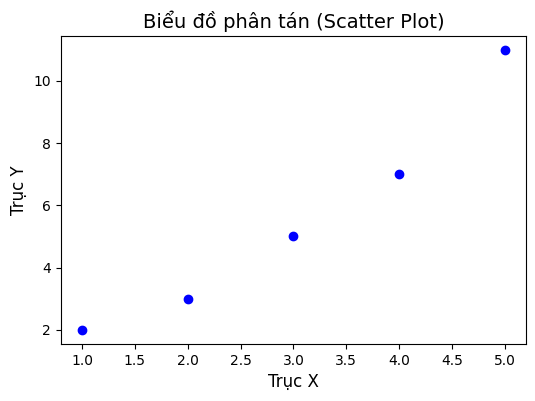

In [ ]:
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color="blue", marker="o")

plt.title("Biểu đồ phân tán (Scatter Plot)", fontsize=14)
plt.xlabel("Trục X", fontsize=12)
plt.ylabel("Trục Y", fontsize=12)
plt.show()

## Bài tập 6: Vẽ biểu đồ hộp

1.	Vẽ biểu đồ hộp cho dữ liệu sau:
o	Dữ liệu: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


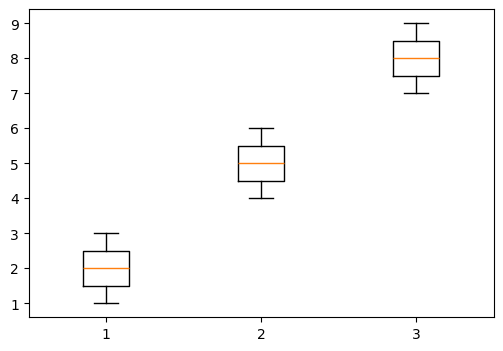

In [ ]:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

plt.figure(figsize=(6,4))
plt.boxplot(data)
plt.show()

2.	Thêm tiêu đề và nhãn cho các trục.

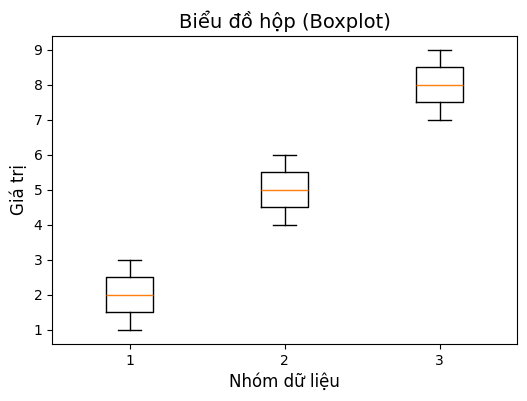

In [ ]:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

plt.figure(figsize=(6,4))
plt.boxplot(data)

plt.title("Biểu đồ hộp (Boxplot)", fontsize=14)
plt.xlabel("Nhóm dữ liệu", fontsize=12)
plt.ylabel("Giá trị", fontsize=12)
plt.show()

## Bài tập 7: Vẽ biểu đồ histogram

1.	Vẽ biểu đồ histogram cho dữ liệu sau:
o	Dữ liệu: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]


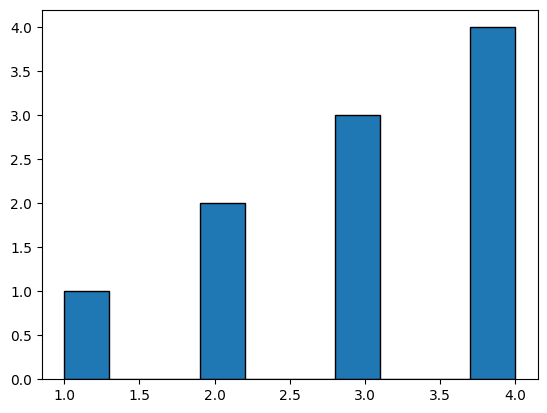

In [ ]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

plt.hist(data, edgecolor='black')
plt.show()


2.	Đặt số lượng bins là 4 và thêm tiêu đề cho biểu đồ.

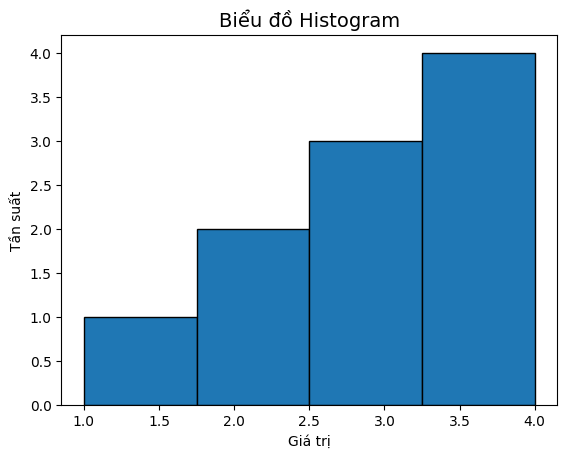

In [ ]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

plt.hist(data, bins=4, edgecolor='black')

plt.title("Biểu đồ Histogram", fontsize=14)
plt.xlabel("Giá trị")
plt.ylabel("Tần suất")
plt.show()


## Bài tập 8:Viết chương trình python tạo ra ma trận. Xuất ra ma trận với tên là matran1.txt


In [ ]:
data = [
    [0, 20, 42, 31, 6, 24],
    [10, 0, 17, 6, 35, 18],
    [25, 5, 0, 27, 14, 9],
    [12, 9, 24, 0, 30, 12],
    [14, 7, 21, 15, 0, 38],
    [40, 15, 16, 5, 20, 0]
]

file_path = "/content/drive/MyDrive/6_Nguyễn Hoàng Thiên Bảo_Tuần3/matran1.txt"

with open(file_path, "w") as f:
    f.write("6 1\n")
    for row in data:
        f.write(" ".join(map(str, row)) + "\n")

print(f"Đã tạo file ma trận tại: {file_path}")


Đã tạo file ma trận tại: /content/drive/MyDrive/6_Nguyễn Hoàng Thiên Bảo_Tuần3/matran1.txt


## Bài tập 9 viết chương trình python đọc vào file matran1.txt. Áp dụng thuật toán GTS1 để viết chương trình tìm thành trình với chi phí là thấp nhất. Xuất ra file hanhtrinhthapnhat.txt

In [ ]:
import sys

def readfile(file_path):
    with open(file_path, "r") as f:
        n, start = map(int, f.readline().split())
        matrix = []
        for _ in range(n):
            row = list(map(int, f.readline().split()))
            matrix.append(row)
    return n, start, matrix

def select_next_city(matrix, n, current_city, visited):
    min_cost = sys.maxsize
    next_city = -1
    for i in range(n):
        if not visited[i] and matrix[current_city][i] < min_cost:
            min_cost = matrix[current_city][i]
            next_city = i
    return next_city

def gts1(n, start, matrix):
    visited = [False] * n
    path = [start - 1]
    visited[start - 1] = True
    current_city = start - 1
    cost = 0

    for _ in range(n - 1):
        w = select_next_city(matrix, n, current_city, visited)
        path.append(w)
        visited[w] = True
        cost += matrix[current_city][w]
        current_city = w

    cost += matrix[current_city][start - 1]
    path.append(start - 1)

    return path, cost

def save_result(file_path, path, cost):
    with open(file_path, "w") as f:
        f.write("Tour: ")
        f.write(" -> ".join(str(p + 1) for p in path))
        f.write("\n")
        f.write(f"Cost: {cost}\n")

file_path = "/content/drive/MyDrive/6_Nguyễn Hoàng Thiên Bảo_Tuần3/matran1.txt"
output_path = "/content/drive/MyDrive/6_Nguyễn Hoàng Thiên Bảo_Tuần3/hanhtrinhthapnhat.txt"

n, start, matrix = readfile(file_path)
path, cost = gts1(n, start, matrix)


print("Tour:", " -> ".join(str(p + 1) for p in path))
print("Cost:", cost)

save_result(output_path, path, cost)
print("Đã lưu vào file:", output_path)


Tour: 1 -> 5 -> 2 -> 4 -> 6 -> 3 -> 1
Cost: 72
Đã lưu vào file: /content/drive/MyDrive/6_Nguyễn Hoàng Thiên Bảo_Tuần3/hanhtrinhthapnhat.txt
